# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
data = pd.read_csv(r'C:\Users\gixi_\Downloads\IRONHACK\Data/Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<AxesSubplot:>

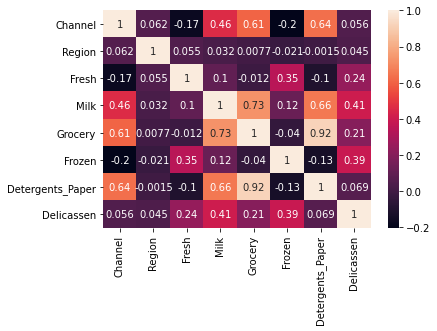

In [4]:
sns.heatmap(data.corr(), annot = True)

In [5]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<AxesSubplot:>

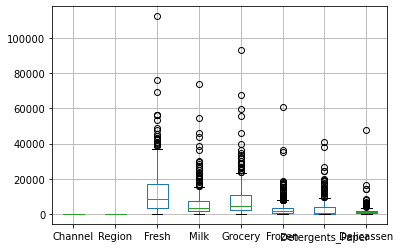

In [6]:
data.boxplot()

In [7]:
# For each feature find the data points with extreme high or low values
for feature in data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65,86,145]

# Remove the outliers, if any were specified
good_data = data.drop(data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Channel':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


Data points considered outliers for the feature 'Region':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


Data points considered outliers for the feature 'Fresh':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
29,1,3,43088,2100,2609,1200,1107,823
39,1,3,56159,555,902,10002,212,2916
47,2,3,44466,54259,55571,7782,24171,6465
52,2,3,40721,3916,5876,532,2587,1278
87,1,3,43265,5025,8117,6312,1579,14351
103,1,3,56082,3504,8906,18028,1480,2498
125,1,3,76237,3473,7102,16538,778,918
129,1,3,42312,926,1510,1718,410,1819
176,1,3,45640,6958,6536,7368,1532,230
181,1,3,112151,29627,18148,16745,4948,8550


Data points considered outliers for the feature 'Milk':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
23,2,3,26373,36423,22019,5154,4337,16523
28,2,3,4113,20484,25957,1158,8604,5206
38,2,3,4591,15729,16709,33,6956,433
45,2,3,5181,22044,21531,1740,7353,4985
47,2,3,44466,54259,55571,7782,24171,6465
49,2,3,4967,21412,28921,1798,13583,1163
56,2,3,4098,29892,26866,2616,17740,1340
61,2,3,35942,38369,59598,3254,26701,2017
65,2,3,85,20959,45828,36,24231,1423
85,2,3,16117,46197,92780,1026,40827,2944


Data points considered outliers for the feature 'Grocery':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
28,2,3,4113,20484,25957,1158,8604,5206
43,2,3,630,11095,23998,787,9529,72
47,2,3,44466,54259,55571,7782,24171,6465
49,2,3,4967,21412,28921,1798,13583,1163
56,2,3,4098,29892,26866,2616,17740,1340
61,2,3,35942,38369,59598,3254,26701,2017
65,2,3,85,20959,45828,36,24231,1423
77,2,3,12205,12697,28540,869,12034,1009
85,2,3,16117,46197,92780,1026,40827,2944
86,2,3,22925,73498,32114,987,20070,903


Data points considered outliers for the feature 'Frozen':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
22,1,3,31276,1917,4469,9408,2381,4334
39,1,3,56159,555,902,10002,212,2916
40,1,3,24025,4332,4757,9510,1145,5864
47,2,3,44466,54259,55571,7782,24171,6465
70,1,3,16705,2037,3202,10643,116,1365
72,1,3,4420,5139,2661,8872,1321,181
73,2,3,19899,5332,8713,8132,764,648
88,1,3,7864,542,4042,9735,165,46
91,1,3,12754,2762,2530,8693,627,1117
93,1,3,11314,3090,2062,35009,71,2698


Data points considered outliers for the feature 'Detergents_Paper':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
43,2,3,630,11095,23998,787,9529,72
47,2,3,44466,54259,55571,7782,24171,6465
49,2,3,4967,21412,28921,1798,13583,1163
56,2,3,4098,29892,26866,2616,17740,1340
61,2,3,35942,38369,59598,3254,26701,2017
65,2,3,85,20959,45828,36,24231,1423
77,2,3,12205,12697,28540,869,12034,1009
85,2,3,16117,46197,92780,1026,40827,2944
86,2,3,22925,73498,32114,987,20070,903
92,2,3,9198,27472,32034,3232,18906,5130


Data points considered outliers for the feature 'Delicassen':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,2,3,6353,8808,7684,2405,3516,7844
4,2,3,22615,5410,7198,3915,1777,5185
17,1,3,5876,6157,2933,839,370,4478
22,1,3,31276,1917,4469,9408,2381,4334
23,2,3,26373,36423,22019,5154,4337,16523
24,2,3,22647,9776,13792,2915,4482,5778
28,2,3,4113,20484,25957,1158,8604,5206
36,1,3,29955,4362,5428,1729,862,4626
40,1,3,24025,4332,4757,9510,1145,5864
45,2,3,5181,22044,21531,1740,7353,4985


array([[<AxesSubplot:title={'center':'Channel'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'Fresh'}>],
       [<AxesSubplot:title={'center':'Milk'}>,
        <AxesSubplot:title={'center':'Grocery'}>,
        <AxesSubplot:title={'center':'Frozen'}>],
       [<AxesSubplot:title={'center':'Detergents_Paper'}>,
        <AxesSubplot:title={'center':'Delicassen'}>, <AxesSubplot:>]],
      dtype=object)

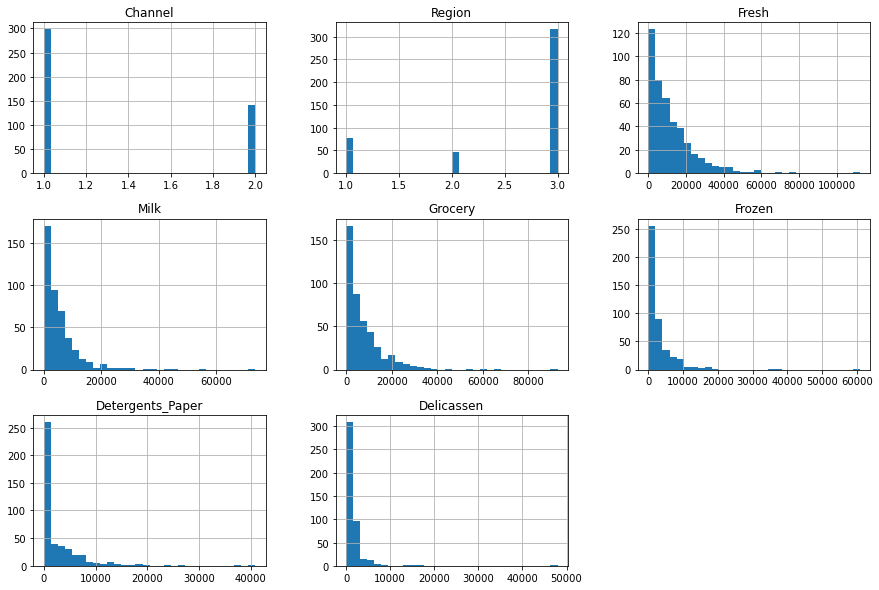

In [8]:
data.hist(bins=30, figsize=(15, 10))

In [9]:
# Your observations here

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [10]:
# Your code here


In [11]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [12]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
scaler.fit(data)
customers_scale = pd.DataFrame(scaler.transform(data),columns = data.columns)
customers_scale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [13]:
# Your code here:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(customers_scale)
data['labels'] = kmeans.labels_

Count the values in `labels`.

In [14]:
# Your code here:
data['labels'].value_counts()

3    211
0    126
1     91
4     10
2      2
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [15]:
# Your code here
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
dbscan_cluster = DBSCAN(eps=0.5)
dbscan_cluster.fit(customers_scale)
data['labels_DBSCAN'] = dbscan_cluster.labels_

Count the values in `labels_DBSCAN`.

In [16]:
# Your code here
data['labels_DBSCAN'].value_counts()

-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 3      5
 7      5
 0      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

Text(0, 0.5, 'Milk')

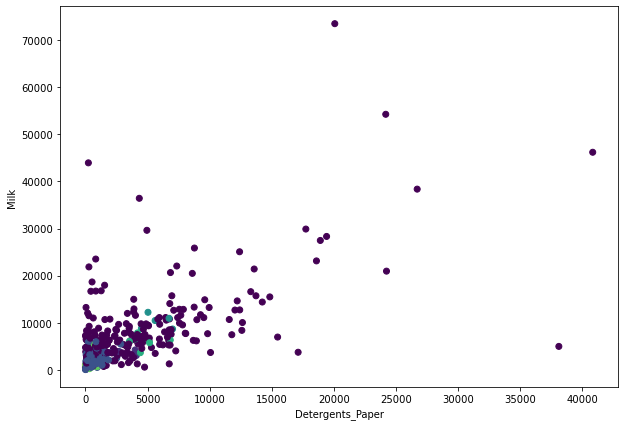

In [17]:
# Your code here:
plt.figure(figsize=(10, 7)) 
plt.scatter(data['Detergents_Paper'],data['Milk'], 
            c= data['labels_DBSCAN'], 
            label=data['labels'])
plt.xlabel("Detergents_Paper")
plt.ylabel("Milk")

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

Text(0, 0.5, 'Fresh')

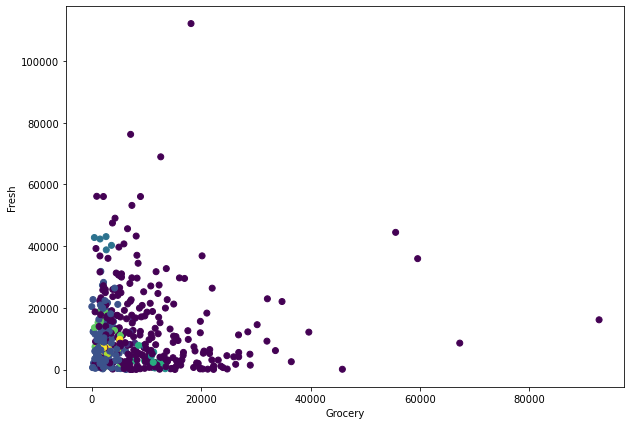

In [18]:
# Your code here:
plt.figure(figsize=(10, 7)) 
plt.scatter(data['Grocery'],data['Fresh'], 
            c= data['labels_DBSCAN'], 
            label=data['labels'])
plt.xlabel("Grocery")
plt.ylabel("Fresh")

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

Text(0, 0.5, 'Delicassen')

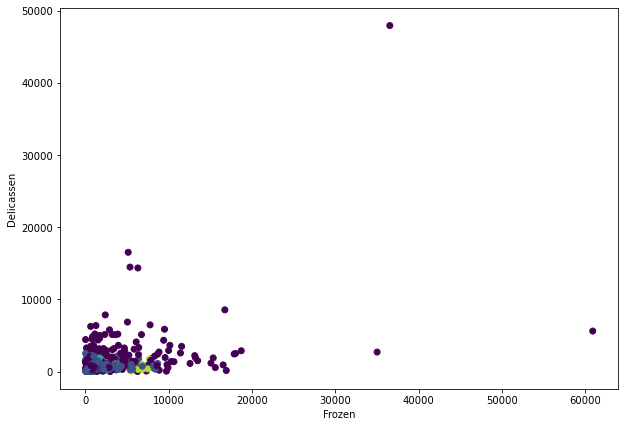

In [19]:
# Your code here:
plt.figure(figsize=(10, 7)) 
plt.scatter(data['Frozen'],data['Delicassen'], 
            c= data['labels_DBSCAN'], 
            label=data['labels'])
plt.xlabel("Frozen")
plt.ylabel("Delicassen")

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [20]:
# Your code here:
data.groupby(['labels','labels_DBSCAN']).mean()

Channel    Region         Fresh          Milk  \
labels labels_DBSCAN                                                   
0      -1             2.000000  2.623853   8447.798165   9533.357798   
        0             2.000000  3.000000  11401.000000   3536.200000   
        3             2.000000  3.000000   2357.200000  10224.800000   
        4             2.000000  3.000000   3068.142857   6095.857143   
1      -1             1.086207  1.396552  14032.672414   4108.482759   
        5             1.000000  1.000000   9837.863636   1751.863636   
        6             1.000000  1.000000   6823.000000   1943.000000   
        7             1.000000  2.000000   7494.600000   1537.600000   
2      -1             1.000000  2.500000  34782.000000  30367.000000   
3      -1             1.013158  3.000000  20225.276316   5875.315789   
        1             1.000000  3.000000   9128.823077   1862.438462   
        2             1.000000  3.000000  41446.600000   1421.200000   
4      -1             2.000000  2.500000  15964.900000  34708.500000   

                           Grocery        Frozen  Detergents_Paper  \
labels labels_DBSCAN                                                 
0      -1             14983.055046   1458.321101       6363.321101   
        0              6729.000000    720.200000       3561.000000   
        3             11862.800000    609.600000       5780.000000   
        4             10355.000000    994.000000       4675.571429   
1      -1              5124.241379   3928.482759       1163.465517   
        5              2161.681818   1513.181818        333.954545   
        6              2372.666667   6780.333333        386.500000   
        7              3383.000000   2575.400000        227.400000   
2      -1             16898.000000  48701.500000        755.500000   
3      -1              6302.486842   5960.105263       1311.026316   
        1              2423.530769   2131.430769        496.576923   
        2              2167.600000   1276.400000        416.200000   
4      -1             48536.900000   3054.600000      24875.200000   

                        Delicassen  
labels labels_DBSCAN                
0      -1              1758.981651  
        0               258.200000  
        3               572.800000  
        4              1826.428571  
1      -1              1405.827586  
        5               669.045455  
        6               613.666667  
        7               941.000000  
2      -1             26776.000000  
3      -1              2293.065789  
        1               741.946154  
        2               784.800000  
4      -1              2942.800000

Which algorithm appears to perform better?

In [21]:
# Your observations here

# Challenge 6 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

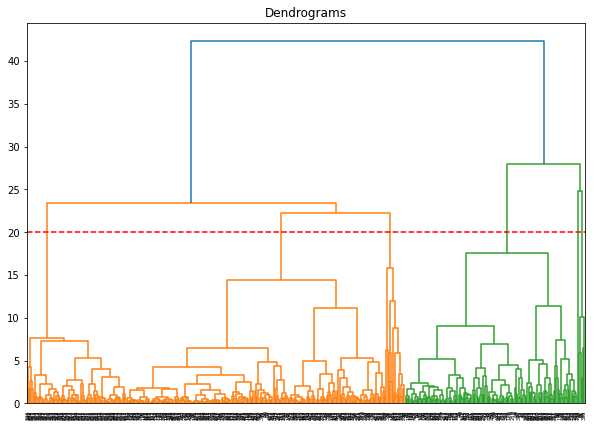

In [22]:
# Your code here
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(customers_scale, method='ward'))
plt.axhline(y=20, color='r', linestyle='--')

In [23]:
# Your comment here

# Challenge 7 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [33]:
# Your code here
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
dbscan_cluster1 = DBSCAN(eps=0.8, min_samples = 200)
dbscan_cluster1.fit(customers_scale)
data['labels_DBSCAN'] = dbscan_cluster1.labels_

Text(0, 0.5, 'Milk')

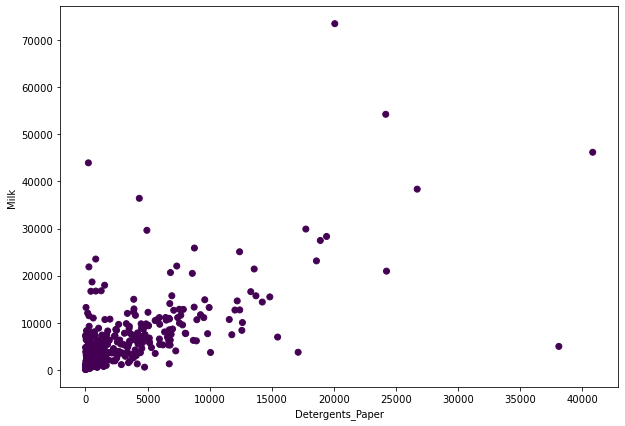

In [34]:
plt.figure(figsize=(10, 7)) 
plt.scatter(data['Detergents_Paper'],data['Milk'], 
            c= data['labels_DBSCAN'], 
            label=data['labels'])
plt.xlabel("Detergents_Paper")
plt.ylabel("Milk")

In [26]:
# Your comment here